Linear Regression - MAE: 1.6344940930580871, MSE: 3.7938537425925034, RMSE: 1.9477817492194816, R²: -0.028367896970036943
KNN - MAE: 1.6672307692307693, MSE: 5.070542000000001, RMSE: 2.251786401948462, R²: -0.37442900196648976
Decision Tree - MAE: 0.7734615384615385, MSE: 2.6777769230769244, RMSE: 1.63639143333034, R²: 0.2741576218334225
Random Forest - MAE: 0.6527365384615387, MSE: 1.562134910576919, RMSE: 1.2498539556991923, R²: 0.5765652811708796
Gradient Boosting - MAE: 0.8725158379203566, MSE: 2.4520002580836926, RMSE: 1.5658864128932508, R²: 0.33535699585181544
SVM - MAE: 1.66589847770031, MSE: 3.684799898758316, RMSE: 1.919583261741547, R²: 0.0011924075776093002
Predicted inflation for 5/2024 using Linear Regression: 1.87%
Predicted inflation for 5/2024 using KNN: 3.54%
Predicted inflation for 5/2024 using Decision Tree: 2.84%
Predicted inflation for 5/2024 using Random Forest: 3.00%
Predicted inflation for 5/2024 using Gradient Boosting: 3.05%
Predicted inflation for 5/2024 usi

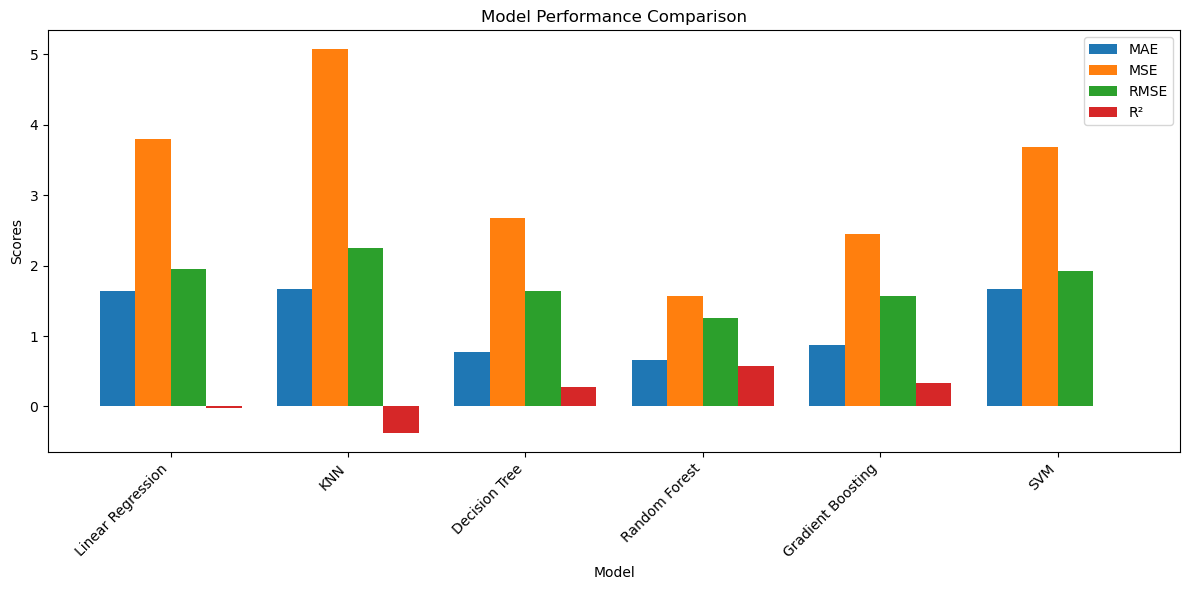

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset from a CSV file
df = pd.read_csv('data_inflasi_indonesia_clean.csv')

# Convert 'periode_inflasi' to datetime format
df['periode_inflasi'] = pd.to_datetime(df['periode_inflasi'], format='%m/%d/%Y')

# Extract year and month from 'periode_inflasi'
df['year'] = df['periode_inflasi'].dt.year
df['month'] = df['periode_inflasi'].dt.month

# Clean 'data_inflasi' to remove '%' and convert to float
df['data_inflasi'] = df['data_inflasi'].str.rstrip('%').astype(float)

# Update features and target
X = df[['year', 'month']]
y = df['data_inflasi']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVM': SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }
    
    # Save model
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.pkl')

# Print results
for name, metrics in results.items():
    print(f"{name} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

# Example usage of models
def predict_inflation(model_name, year, month):
    model = joblib.load(f'{model_name.lower().replace(" ", "_")}_model.pkl')
    input_data = pd.DataFrame({'year': [year], 'month': [month]})
    prediction = model.predict(input_data)
    return prediction[0]

# Example predictions
year_to_predict = 2024
month_to_predict = 5
for name in models.keys():
    predicted_inflation = predict_inflation(name, year_to_predict, month_to_predict)
    print(f"Predicted inflation for {month_to_predict}/{year_to_predict} using {name}: {predicted_inflation:.2f}%")

# Plotting metrics
labels = list(results.keys())
mae_values = [results[label]['MAE'] for label in labels]
mse_values = [results[label]['MSE'] for label in labels]
rmse_values = [results[label]['RMSE'] for label in labels]
r2_values = [results[label]['R²'] for label in labels]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, mae_values, width, label='MAE')
rects2 = ax.bar(x, mse_values, width, label='MSE')
rects3 = ax.bar(x + width, rmse_values, width, label='RMSE')
rects4 = ax.bar(x + 2*width, r2_values, width, label='R²')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()
